<a href="https://colab.research.google.com/github/ShubhamML/Image-Classification-Web-App-/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]
data="images"
labels=['sunflower','rugby ball','ice cream cone']

In [29]:
import os
from os import listdir
from PIL import Image

for category in labels:
    class_num=labels.index(category) #label encoding
    path=os.path.join(data,category) #create path
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resize=resize(img_array,(150,150,3))
        flat_data.append(img_resize.flatten())
        images.append(img_resize)
        target.append(class_num)

flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

        

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'images\\rugby ball'

ValueError: shape mismatch: objects cannot be broadcast to a single shape

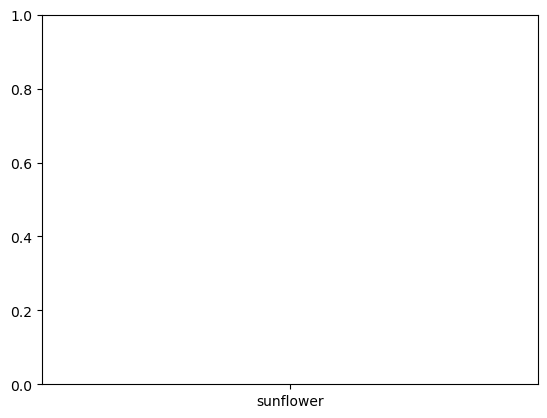

In [15]:
unique,count=np.unique(target,return_counts=True)
plt.bar(labels,count)

In [37]:
#split data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(flat_data,target
                                            ,test_size=0.3,random_state=42)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[{'C':[0.1,1,10,100,1000],'kernel':['linear']},
            {'C':[0.1,1,10,100,1000],'kernel':['rbf'],'gamma':[0.01,0.001,0.0001]}]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid,verbose=True)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']}],
             verbose=True)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=clf.predict(X_test)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       1.00      0.77      0.87        13
           2       1.00      0.69      0.82        13

    accuracy                           0.84        45
   macro avg       0.91      0.82      0.84        45
weighted avg       0.89      0.84      0.84        45



In [41]:
#saving the model using pickle
import pickle
pickle.dump(clf,open('model.pkl','wb'))

In [42]:
model=pickle.load(open('model.pkl','rb'))

Enter the url of the image: https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/sunforest-mix-sunflower-types-1586794598.jpg
(1343, 1154, 3)
Predicted output: sunflower


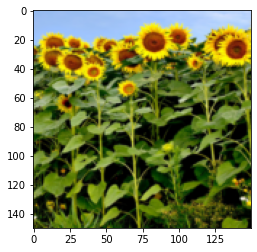

In [43]:
# Testing new image
flat_data=[]
url=input('Enter the url of the image: ')
img=imread(url)
img_resize=resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out=model.predict(flat_data)
y_out=labels[y_out[0]]
print(f'Predicted output: {y_out}')

In [44]:
!pip install streamlit
!pip install pyngrok
from pyngrok import ngrok

In [45]:
%%writefile app.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from skimage.transform import resize
import streamlit as st
import pickle
from PIL import Image
st.set_option('deprecation.showfileUploaderEncoding',False)
st.title('Image Classifier')
st.text('Upload image')
model=pickle.load(open('model.pkl','rb'))
upload_file=st.file_uploader('Choose an image',type='jpg')
if upload_file is not None:
  img=Image.open(upload_file)
  st.image(img,caption='Image uploaded')

if st.button('Predict'):
  labels=['sunflower','rugby ball','ice cream cone']
  st.write('Result')
  flat_data=[]
  img=np.array(img)
  img_resized=resize(img,(150,150,3))
  flat_data.append(img_resized.flatten())
  flat_data=np.array(flat_data)
  y_out=model.predict(flat_data)
  y_out=labels[y_out[0]]
  st.title(f'Predicted output: {y_out}')
  q=model.predict_proba(flat_data)
  for index,item in enumerate(labels):
    st.write(f'{item} : {q[0][index]*100}%')



Overwriting app.py


In [ ]:
!nohup streamlit run app.py & npx localtunnel --port 8501

url=ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'
npx: installed 22 in 3.228s
your url is: https://good-wombat-77.loca.lt
